In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from os import path
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.manifold import Isomap, TSNE
from tqdm import tqdm
from sklearn.model_selection import train_test_split

np.random.seed(123)


# Get the data and do the random train/test split

In [2]:
dir = os.getcwd()
data_path = os.path.join(dir, 'fashion_mnist/fashion_mnist_data.txt')
labels_path = os.path.join(dir, 'fashion_mnist/fashion_mnist_labels.txt')
np.random.seed(2023)

In [3]:
with open(data_path, 'r') as f:
    data = np.loadtxt(f, dtype=np.float32)

with open(labels_path, 'r') as f:
    labels = np.loadtxt(f, dtype=np.uint8)

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.5, stratify=labels, random_state=42)

In [4]:
print(f'Number of training samples: {len(x_train)}')
print(f'Number of test samples: {len(y_train)}')
print(f'Train data labels: {y_train}')
print(f'Test data labels: {y_test}')

Number of training samples: 5000
Number of test samples: 5000
Train data labels: [3 2 2 ... 3 4 0]
Test data labels: [8 9 3 ... 4 9 3]


# Question 1

### Question 1.1

In [5]:
# find mean of each feature
mean = np.mean(data, axis=0) # column wise for each feature
print(mean.shape)
data_centered = data - mean
x_train_centered = x_train - mean
x_test_centered = x_test - mean

(784,)


### Question 1.2

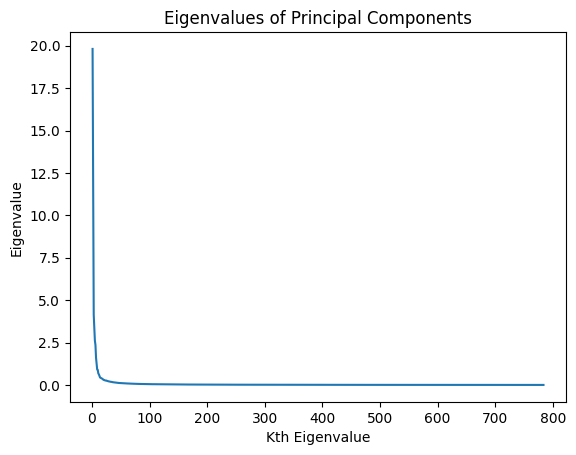

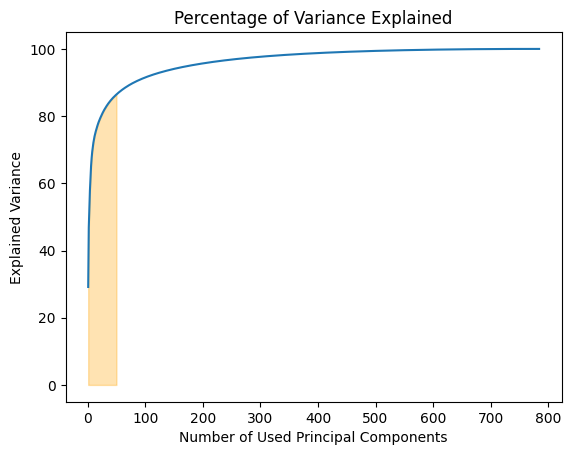

In [6]:
pca = PCA()
pca.fit(x_train_centered)

explained_variance_ratio = pca.explained_variance_ratio_ # The percentage of variance explained by each of the selected components.
eig_vals = pca.explained_variance_ # The actual eigenvalues associated with each principal component.
sorted_eig_vals = sorted(eig_vals, reverse=True)

# plot
plt.plot(range(1,len(eig_vals)+1), sorted_eig_vals)
plt.title('Eigenvalues of Principal Components')
plt.xlabel('Kth Eigenvalue')
plt.ylabel('Eigenvalue')
plt.show()

# First 50 components capture >%80 of the varianca
cumulative = np.cumsum(explained_variance_ratio)*100
x = range(1,len(cumulative)+1)
plt.plot(x, cumulative)
plt.xlabel('Number of Used Principal Components')
plt.ylabel('Explained Variance')
plt.title('Percentage of Variance Explained')
plt.fill_between(x[:50], cumulative[:50], color='orange', alpha=0.3) 
plt.show()

### Question 1.3

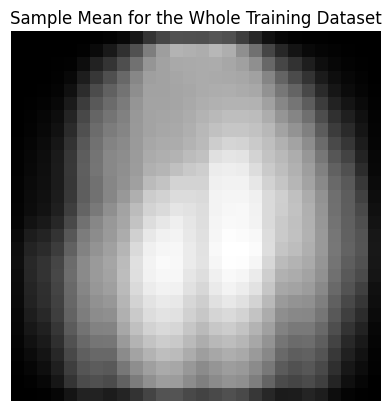

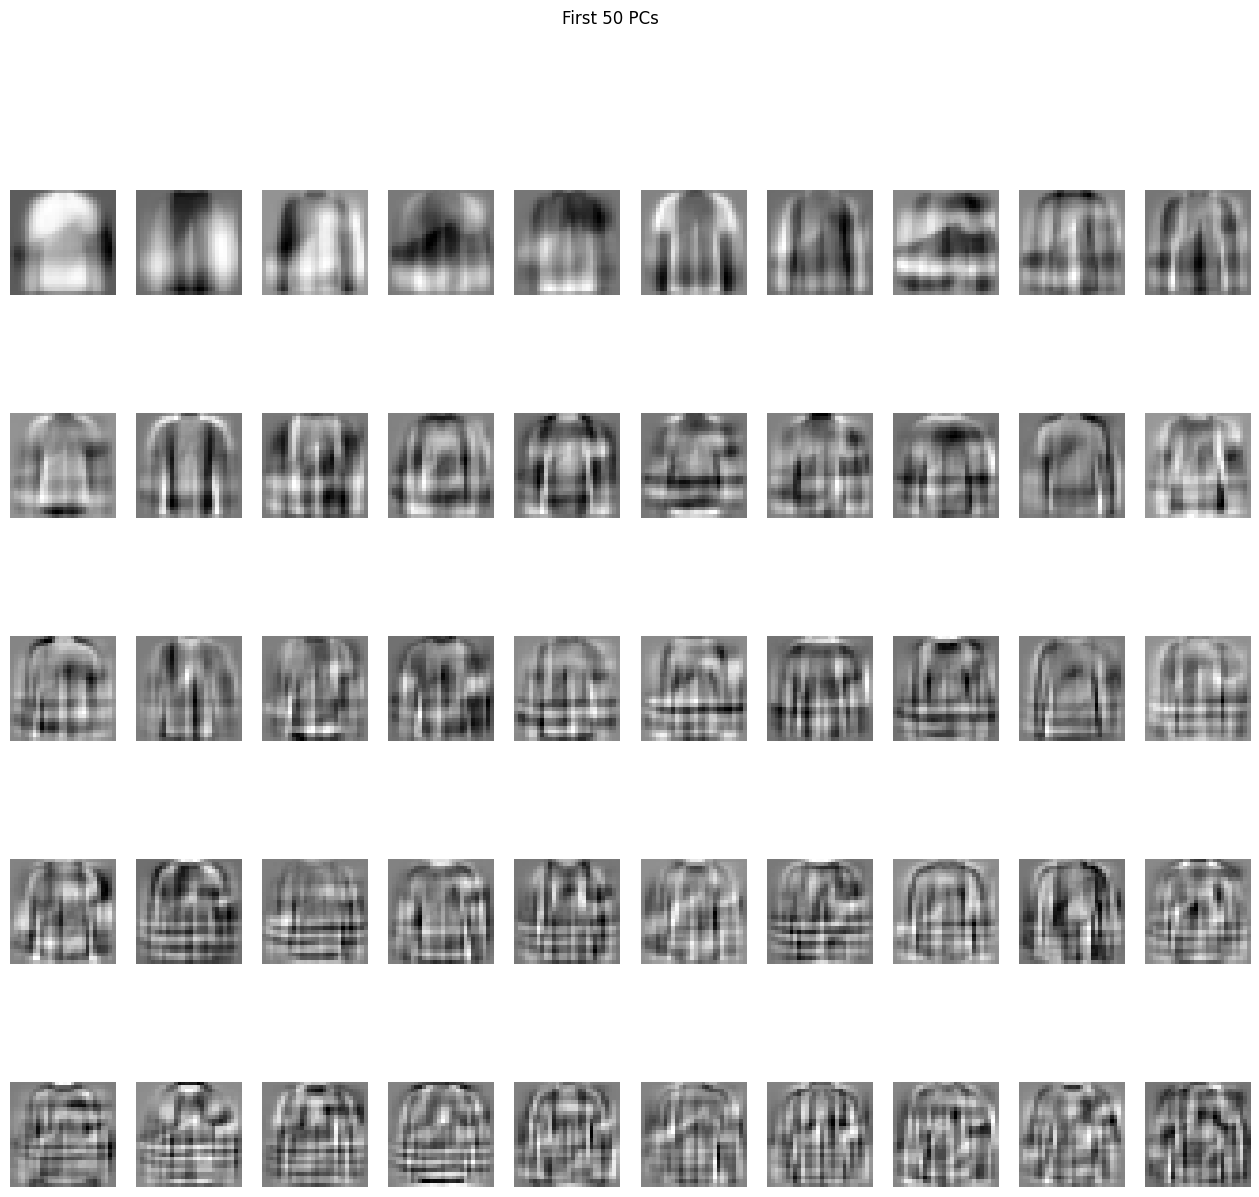

In [7]:
# Plot the mean before centering
train_mean = np.mean(x_train, axis=0)
plt.figure()
plt.axis('off')
plt.title('Sample Mean for the Whole Training Dataset')
train_mean = train_mean.reshape((28, 28)).T
plt.imshow(train_mean, cmap='gray')
plt.show()

# display the first 50 principal components
fig, axis = plt.subplots(nrows=5, ncols=10, figsize=(16, 14))
for index in range(50):
    col = index % 10
    row = index // 10
    axis[row, col].set_axis_off()
    cmp = pca.components_[index, :].reshape((28, 28)).T
    axis[row, col].imshow(cmp, cmap='gray')
plt.suptitle('First 50 PCs')
plt.show()

### Question 1.4

In [8]:
train_error_list = list()
test_error_list = list()
dims = range(10, 401, 5) 
train_t = pca.transform(x_train_centered)
test_t = pca.transform(x_test_centered)

x_train_subspaces = [train_t[:, :dim] for dim in dims]
x_test_subspaces = [test_t[:, :dim] for dim in dims]


for i, d in tqdm(enumerate(dims)):
    
    train_error = 0
    test_error = 0
    gaussianClassifier = QuadraticDiscriminantAnalysis()
    # train the Gaussian
    gaussianClassifier.fit(x_train_subspaces[i], y_train)
    # make predictions
    pred_train = gaussianClassifier.predict(x_train_subspaces[i])
    pred_test = gaussianClassifier.predict(x_test_subspaces[i])

    # compare with ground truth for train data
    for i in range(len(pred_train)):
      if pred_train[i] != y_train[i]:
        train_error = train_error + 1
    train_error_list.append(train_error / len(pred_train))

    # compare with ground truth for test data
    for i in range(len(pred_test)):
      if pred_test[i] != y_test[i]:
        test_error = test_error + 1
    test_error_list.append(test_error / len(pred_test))


79it [00:27,  2.91it/s]


### Question 1.5

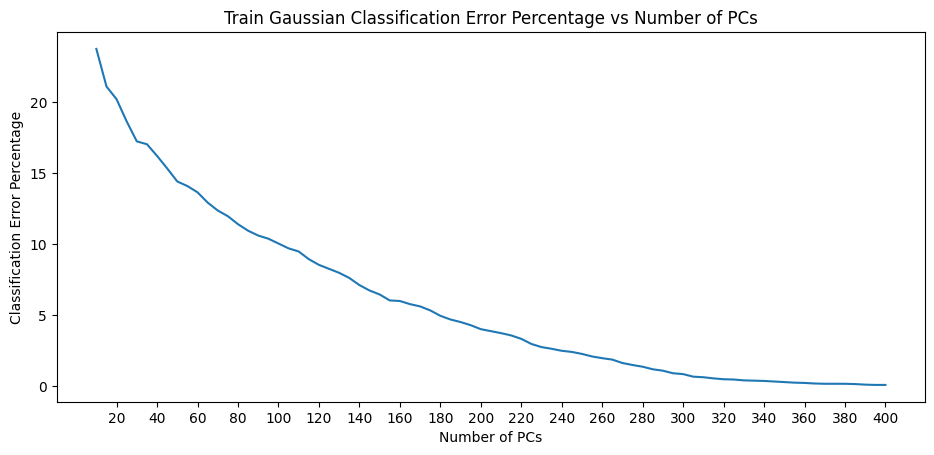

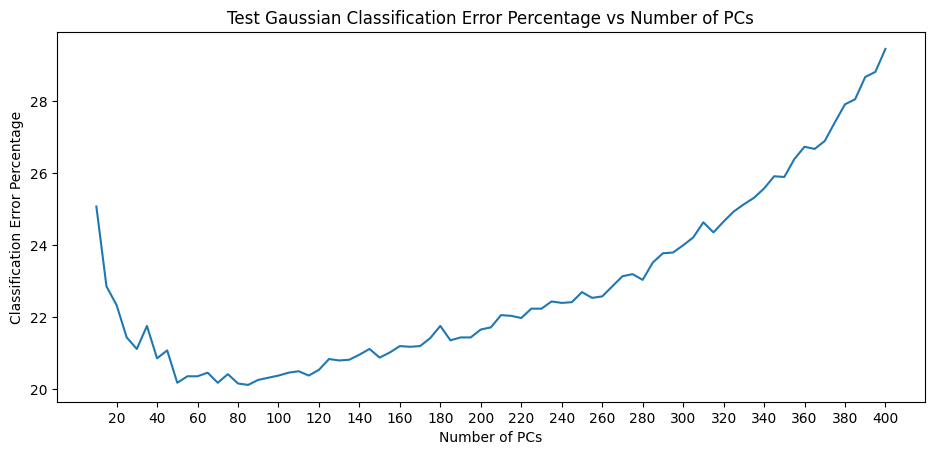

In [9]:
comps = [dim for dim in dims]
train_result = (np.array(train_error_list))*100 # show error percentage
test_result = (np.array(test_error_list))*100 # show error percentage

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] *= 1.75
plt.rcParams["figure.figsize"] = fig_size

# plot train data error
plt.plot(comps, train_result)
plt.title('Train Gaussian Classification Error Percentage vs Number of PCs')
plt.xlabel('Number of PCs')
plt.ylabel('Classification Error Percentage')
plt.xticks(range(20, 401, 20), range(20, 401, 20))
plt.show()

# plot test data error
plt.plot(comps, test_result)
plt.title('Test Gaussian Classification Error Percentage vs Number of PCs')
plt.xlabel('Number of PCs')
plt.ylabel('Classification Error Percentage')
plt.xticks(range(20, 401, 20), range(20, 401, 20))
plt.show()

plt.rcParams.update({'figure.figsize': (6.4, 4.8)})

# Question 2

100%|██████████| 40/40 [00:20<00:00,  1.91it/s]


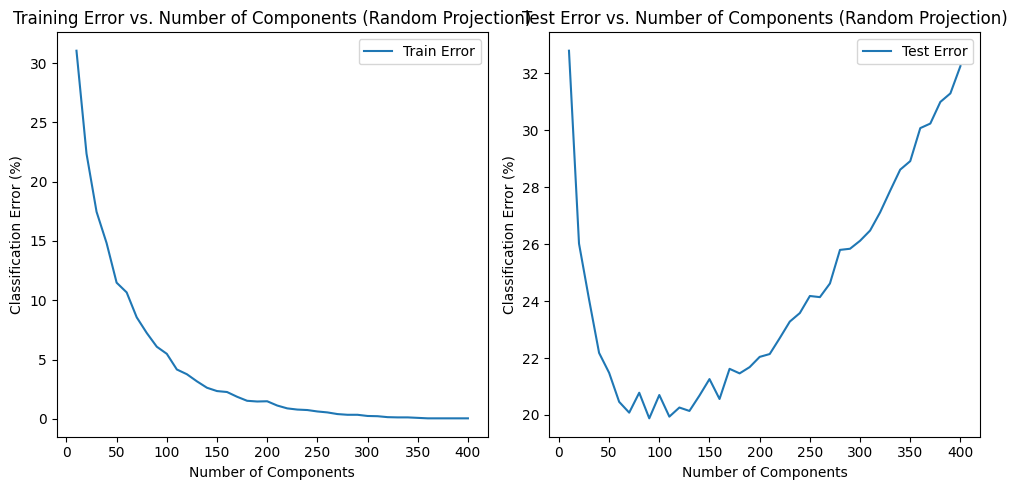

In [10]:
train_error_list = []
test_error_list = []
dims = range(10, 401, 10) 

for dim in tqdm(dims):
    # random transformation matrix
    random_projection_matrix = np.random.randn(dim, x_train_centered.shape[1]) / np.sqrt(d)
    
    # Project the data
    x_train_projected = np.dot(x_train_centered, random_projection_matrix.T)
    x_test_projected = np.dot(x_test_centered, random_projection_matrix.T)
    
    # Initialize and train the Gaussian classifier
    gaussianClassifier = QuadraticDiscriminantAnalysis()
    gaussianClassifier.fit(x_train_projected, y_train)
    
    pred_train = gaussianClassifier.predict(x_train_projected)
    train_err = np.mean(pred_train != y_train)
    train_error_list.append(train_err * 100)  # Error percentage

    pred_test = gaussianClassifier.predict(x_test_projected)
    test_err = np.mean(pred_test != y_test)
    test_error_list.append(test_err * 100)  # Error percentage

# Plotting the classification error vs. the number of components
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(dims, train_error_list, label='Train Error')
plt.title('Training Error vs. Number of Components (Random Projection)')
plt.xlabel('Number of Components')
plt.ylabel('Classification Error (%)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(dims, test_error_list, label='Test Error')
plt.title('Test Error vs. Number of Components (Random Projection)')
plt.xlabel('Number of Components')
plt.ylabel('Classification Error (%)')
plt.legend()

plt.tight_layout()
plt.show()


# Question 3

In [11]:
dims = range(10, 401, 10) 
train_err = []
test_err = []

for i, dim in enumerate(dims):
    isomap = Isomap(n_components=dim, n_neighbors=10)
    isomap.fit(data_centered, labels)

    isomap_train = isomap.transform(x_train_centered)
    isomap_test = isomap.transform(x_test_centered)
    gaussianClassifier = QuadraticDiscriminantAnalysis()
    gaussianClassifier.fit(isomap_train, y_train)
    train_preds = gaussianClassifier.predict(isomap_train)
    test_preds = gaussianClassifier.predict(isomap_test)

    trainErrK = 1 - accuracy_score(y_train, train_preds)
    testErrK = 1 - accuracy_score(y_test, test_preds)  
    train_err.append(trainErrK)
    test_err.append(testErrK)

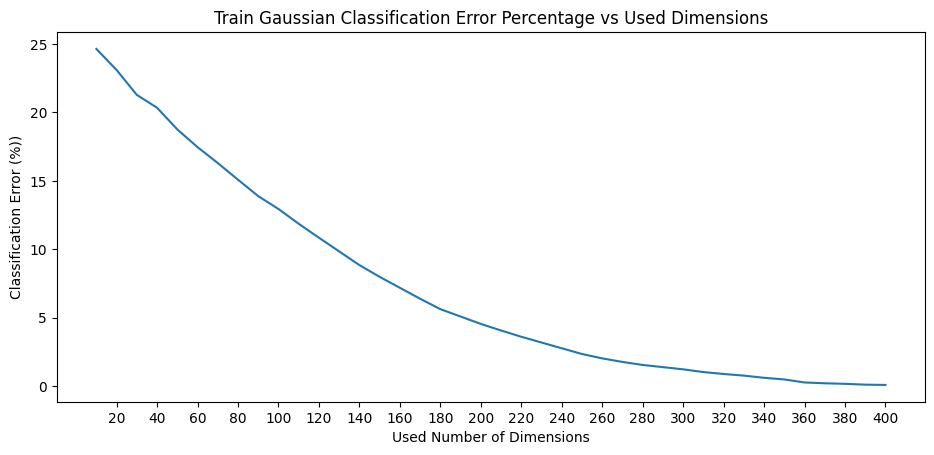

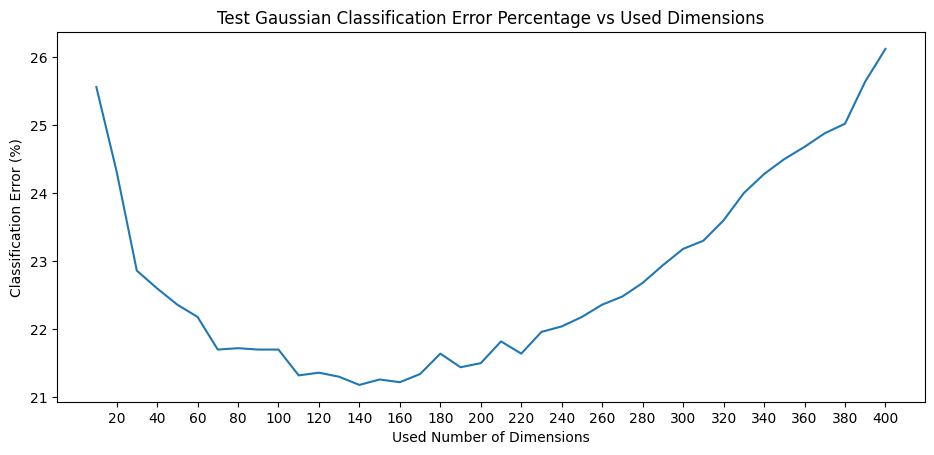

In [12]:
train_percentage_error = (np.array(train_err))*100
test_percentage_error = (np.array(test_err))*100
comps = [dim for dim in dims]

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] *= 1.75
plt.rcParams["figure.figsize"] = fig_size

plt.plot(comps, train_percentage_error)
plt.title('Train Gaussian Classification Error Percentage vs Used Dimensions')
plt.xlabel('Used Number of Dimensions')
plt.ylabel('Classification Error (%))')
plt.xticks(range(20, 401, 20), range(20, 401, 20))
plt.show()

plt.plot(comps, test_percentage_error)
plt.title('Test Gaussian Classification Error Percentage vs Used Dimensions')
plt.xlabel('Used Number of Dimensions')
plt.ylabel('Classification Error (%)')
plt.xticks(range(20, 401, 20), range(20, 401, 20))
plt.show()

plt.rcParams.update({'figure.figsize': (6.4, 4.8)}) 

# Question 4

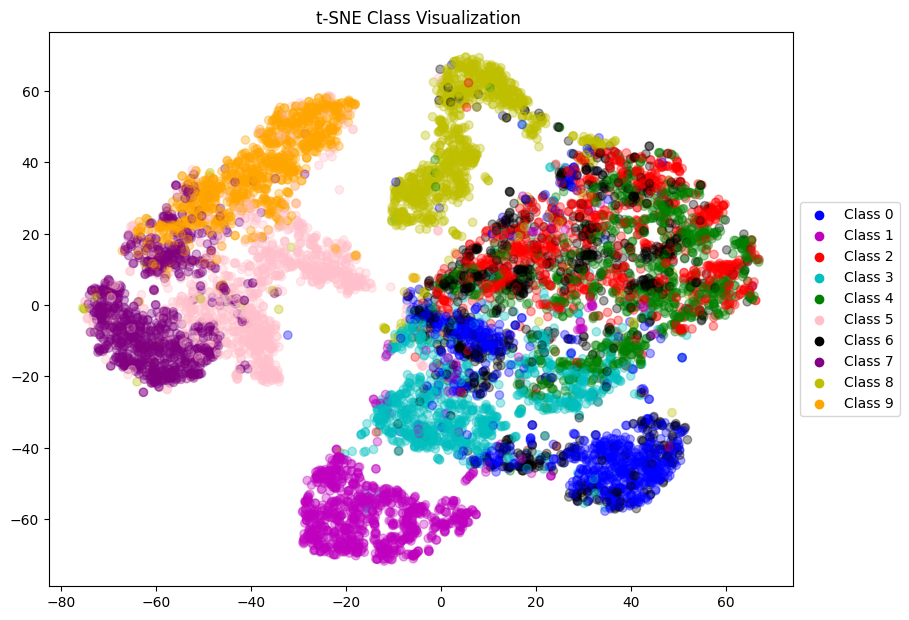

In [13]:
tsne = TSNE(perplexity=40)
x_tsne = tsne.fit_transform(data_centered)

# represent each class with a color
class_colors = ['b', 'm', 'r', 'c', 'g', 'pink', 'k', 'purple', 'y', 'orange']

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] *= 1.50
fig_size[1] *= 1.50
plt.rcParams["figure.figsize"] = fig_size

sct_plot = plt.scatter(x_tsne[:, 0], x_tsne[:, 1],color=[class_colors[l] for l in labels], alpha=0.35)

plt_legend = [plt.scatter([], [], color=class_colors[i], label='Class {}'.format(i)) for i in range(len(class_colors))]

plt.title('t-SNE Class Visualization ')
plt.legend(handles=plt_legend, loc='center left', bbox_to_anchor=(1.00, 0.5))
plt.show()

plt.rcParams.update({'figure.figsize': (6.8, 5.0)}) 